In [668]:
import requests
import inspect
import pytz
import pandas as pd
import numpy as np

from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from time import ctime   # ctime converts epoch time (ex:1661522400) to string form (Thu Aug 25 16:00:00 2022)
from time import gmtime   # Convert a time expressed in seconds since the epoch to a struct_time in UTC in which the dst flag is always zero.
from time import localtime # Like gmtime() but converts to local time.

from datetime import datetime, timedelta
today = datetime.now()
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 20




### 2 fichiers créés par node-red et mis à jour toutes les heures avec openweather node dans onglet Temp/Hum

#### json_file ="C:/Users/jean/OneDrive/Bureau/5days.txt"

#### json_file ="Y:/Documents/5days.txt"

#### le fichier contient une liste de 40 lignes :
- une ligne = 3 heures, 
- 8 lignes par jour 
- sur 5 jours


In [669]:
try:
    json_file = "Y:/Documents/5days.txt"  # pc cuisine
    current = pd.read_json(json_file)
except:
    json_file = "Z:/Documents/5days.txt"  # pc chambre
    current = pd.read_json(json_file)

In [670]:
#current['dates'] = [datetime.fromtimestamp(current.dt[k], pytz.timezone('Europe/Paris')) for k in range(40)]
current['dates'] = [datetime.fromtimestamp(current.dt[k]) for k in range(40)]
current['h_date'] = [datetime.fromtimestamp(current.dt[k]).strftime('%d/%m/%Y %H:%M:%S') for k in range(40)]
current['h_time'] = [datetime.fromtimestamp(current.dt[k]).strftime('%H') for k in range(40)]
current


,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf,dt,dates,h_date,h_time
0,10.99,10.42,10.99,11.68,1009,1009,999,87,-0.69,1712091600,2024-04-02 23:00:00,02/04/2024 23:00:00,23
1,10.97,10.37,10.92,10.97,1008,1008,998,86,0.05,1712102400,2024-04-03 02:00:00,03/04/2024 02:00:00,02
2,10.46,9.96,10.19,10.46,1007,1007,996,92,0.27,1712113200,2024-04-03 05:00:00,03/04/2024 05:00:00,05
3,10.18,9.71,10.18,10.18,1005,1005,995,94,0.00,1712124000,2024-04-03 08:00:00,03/04/2024 08:00:00,08
4,11.29,10.82,11.29,11.29,1007,1007,997,90,0.00,1712134800,2024-04-03 11:00:00,03/04/2024 11:00:00,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,11.11,10.50,11.11,11.11,1020,1020,1010,85,0.00,1712469600,2024-04-07 08:00:00,07/04/2024 08:00:00,08
36,14.25,13.51,14.25,14.25,1021,1021,1011,68,0.00,1712480400,2024-04-07 11:00:00,07/04/2024 11:00:00,11
37,16.14,15.30,16.14,16.14,1020,1020,1010,57,0.00,1712491200,2024-04-07 14:00:00,07/04/2024 14:00:00,14
38,16.76,15.95,16.76,16.76,1018,1018,1009,56,0.00,1712502000,2024-04-07 17:00:00,07/04/2024 17:00:00,17


In [671]:
debut = current.head(1).h_date[0]
fin = current.tail(1).h_date[39]
debut, fin

('02/04/2024 23:00:00', '07/04/2024 20:00:00')

<Axes: >

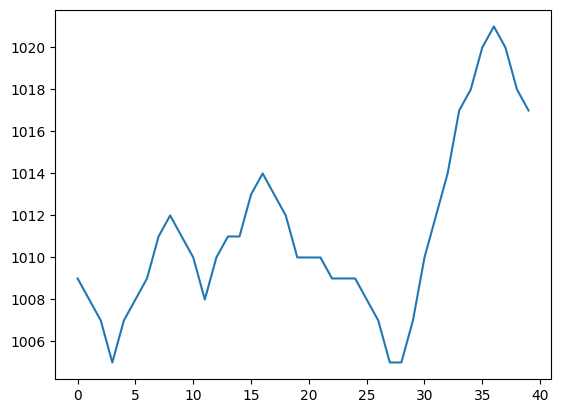

In [672]:
(current.pressure).plot()


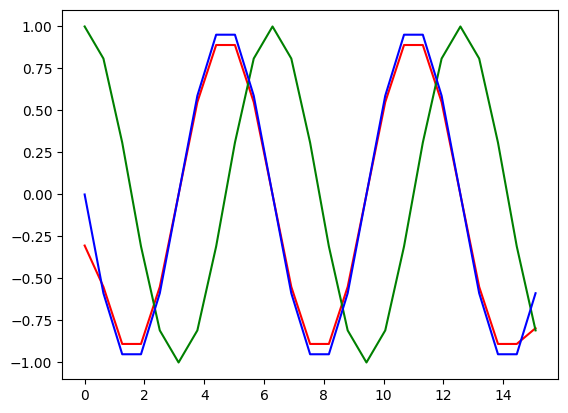

In [673]:
pi = np.pi
x = np.arange(0,5*pi,0.2*pi)
y = np.cos(x) 
# derivative dy/dx = -sin(x)
der = np.gradient(y,x)
plt.plot(x, der, 'r', x, y, 'g', x, -np.sin(x),'b')
plt.show()

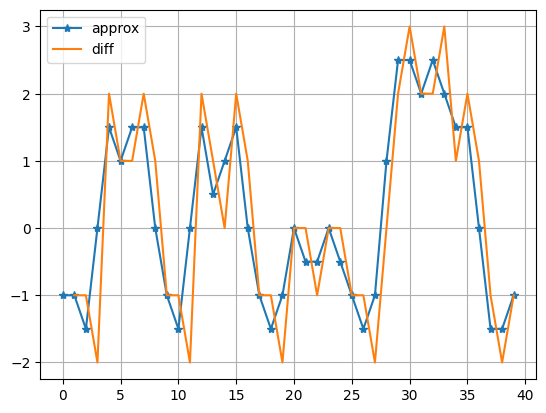

In [674]:
# derivative of pressure
dy = current.pressure#.diff()
#dy.plot()
# we sample a sin(x) function
dx = current.index.step
x = np.arange(0,40)
#current.pressure.diff().plot(label='diff')
# we calculate the derivative, with np.gradient
plt.plot(x,np.gradient(dy, dx), '-*', label='approx')
#plt.plot()
dy.diff().plot(x=x,label='diff')
plt.legend()
plt.grid()


In [675]:
dy.diff()

0     NaN
1    -1.0
2    -1.0
3    -2.0
4     2.0
     ... 
35    2.0
36    1.0
37   -1.0
38   -2.0
39   -1.0
Name: pressure, Length: 40, dtype: float64

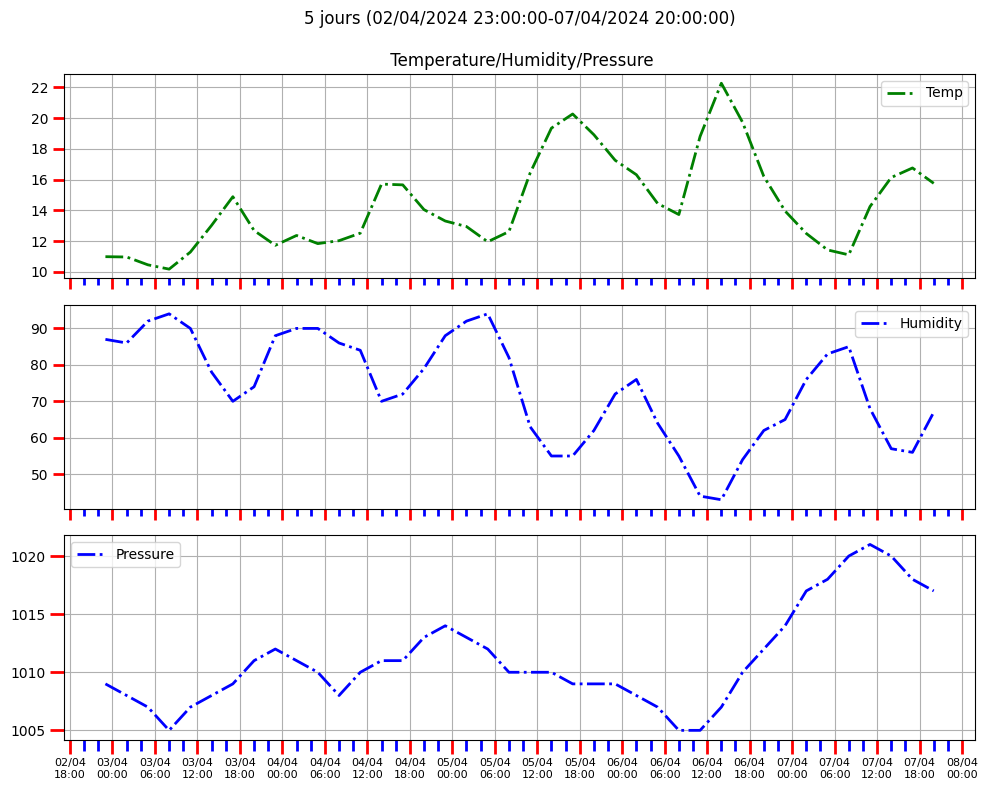

In [676]:
#fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True)
# the size of A4 paper
fig.set_size_inches(10, 8)

ax1.tick_params('x', labelsize=8)
ax2.tick_params('x', labelsize=8)
ax3.tick_params('x', labelsize=8)

# format affichage dates sur axe des x
formatter = DateFormatter('%d/%m\n%H:%M')
#ax1.xaxis.set_major_formatter(formatter)
#ax2.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_formatter(formatter)

# nombre de ticks sur axe des x
major_ticks = 1/4                    # toutes les 6 heures pour 1/4, 12h pour 1/2
minor_ticks = major_ticks/3          # facteur div = 4  -> minor ticks toutes les 3 heures

# temperature
ax1.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax1.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # ???? pas d'affichage des minor ticks ???
# format des ticks
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=8, color='r')
ax1.tick_params(which='minor', length=5, color='b')
#plot
ax1.plot(current.dates,current.temp,'g-.',label='Temp',linewidth=2)
#plt.plot(current.dates,current.temp_max,'r-.',label='Max',linewidth=2)
#plt.plot(current.dates,current.temp_min,'b-.',label='Min',linewidth=2)

# humidity
ax2.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax2.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  
# format des ticks
ax2.tick_params(which='both', width=2)
ax2.tick_params(which='major', length=8, color='r')
ax2.tick_params(which='minor', length=5, color='b')
ax2.plot(current.dates,current.humidity,'b-.',label='Humidity',linewidth=2)

# pression
ax3.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax3.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  
# format des ticks
ax3.tick_params(which='both', width=2)
ax3.tick_params(which='major', length=10, color='r')
ax3.tick_params(which='minor', length=8, color='b')
ax3.plot(current.dates,current.pressure,'b-.',label='Pressure',linewidth=2)

ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
ax3.grid()
ax3.legend()

ax1.set_title(f'5 jours ({debut}-{fin})\n\n Temperature/Humidity/Pressure')
#ax2.set_title(f'Humidity')
fig.tight_layout()


# tendances

## temp * pression / humidity
- plus de pression, moins d'humidité = meilleure tendance

In [677]:
'''Le point de rosée est une donnée thermodynamique caractérisant l'humidité dans un gaz. 
Le point de rosée de l'air est la température à laquelle la pression partielle de vapeur 
d'eau est égale à sa pression de vapeur saturante. Il s'agit donc de la température à 
laquelle il faut refroidir un volume d'air, à pression et humidité absolue constantes, 
pour qu'il devienne saturé donc il y a condensation.

La dépression du point de rosée est la différence entre la température et le point de rosée : (T-Tr)
 à un niveau de pression donnée de l'atmosphère terrestre
'''
import numpy as np
a, b = 17.27, 237.7

def alpha(T,phi):
    '''
    0 < T < 60
    0.01 < phi < 1
    '''
    return a*T/(b+T) + np.log(phi)

def dewpoint(T, phi): # phi : humidité relative
    f = alpha(T,phi)
    Tr = b*f/(a-f)
    return (T,Tr,T-Tr) #round(Tr,2), round(T-Tr,2)   # dewpoint, depression


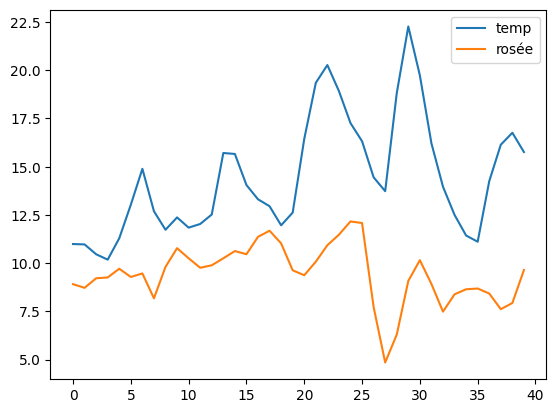

In [678]:
x = np.arange(40)
x_temp = current.temp
x_hum = current.humidity/100

rosee = dewpoint(x_temp,x_hum)
plt.plot(x,x_temp,label='temp')
plt.plot(x,rosee[1],label='rosée')
plt.legend()


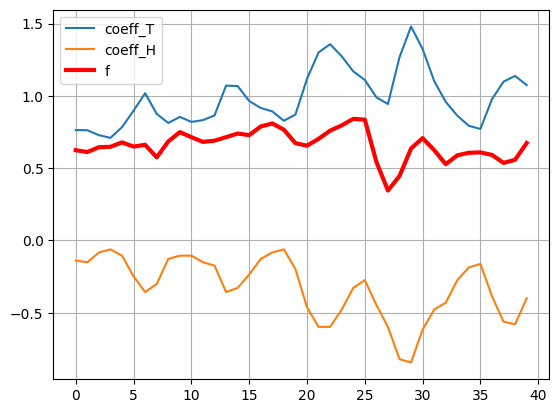

In [679]:
y_temp = a*x_temp/(b+x_temp)
y_hum = np.log(x_hum)
plt.plot(x,y_temp,label='coeff_T')
plt.plot(x,y_hum,label='coeff_H')  # valeurs négatives
f = y_temp+y_hum  # alpha()
plt.plot(x,f,label='f',lw=3,c='red')
plt.grid()
plt.legend()


(237.7, 17.27)

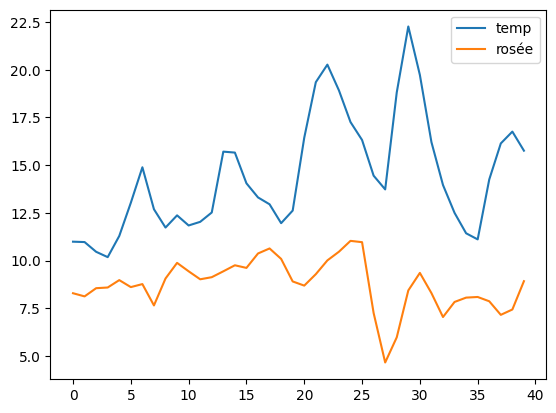

In [680]:
plt.plot(x,x_temp,label='temp')
plt.plot(x,b*f/(a+f),label='rosée')
plt.legend()
b,a


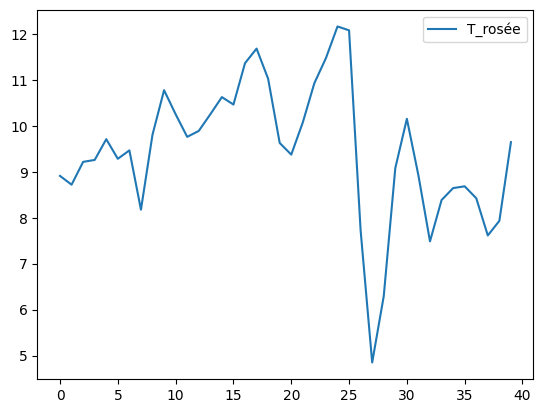

In [681]:
plt.plot(x,b*f/(a-f),label='T_rosée')
plt.legend()

In [682]:

f = y_temp+y_hum
f, alpha(y_temp,x_hum)


(0     0.623926
 1     0.611038
 2     0.644553
 3     0.647373
 4     0.677716
         ...   
 35    0.608631
 36    0.591109
 37    0.535966
 38    0.557670
 39    0.673361
 Length: 40, dtype: float64,
 0    -0.083990
 1    -0.095647
 2    -0.030655
 3    -0.010499
 4    -0.048653
         ...   
 35   -0.106673
 36   -0.314986
 37   -0.482705
 38   -0.497568
 39   -0.322809
 Length: 40, dtype: float64)

In [683]:
(x,y_hum)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 0    -0.139262
 1    -0.150823
 2    -0.083382
 3    -0.061875
 4    -0.105361
         ...   
 35   -0.162519
 36   -0.385662
 37   -0.562119
 38   -0.579818
 39   -0.400478
 Name: humidity, Length: 40, dtype: float64)

In [684]:
dewpoint(current.temp[0],current.humidity[0]/100)

(10.99, 8.909444307213699, 2.0805556927863016)

In [685]:
dewpt = dewpoint(current.temp ,current.humidity/100) 
dewpt

(0     10.99
 1     10.97
 2     10.46
 3     10.18
 4     11.29
       ...  
 35    11.11
 36    14.25
 37    16.14
 38    16.76
 39    15.76
 Name: temp, Length: 40, dtype: float64,
 0     8.909444
 1     8.718652
 2     9.215403
 3     9.257301
 4     9.708921
         ...   
 35    8.683049
 36    8.424213
 37    7.613170
 38    7.931751
 39    9.644000
 Length: 40, dtype: float64,
 0     2.080556
 1     2.251348
 2     1.244597
 3     0.922699
 4     1.581079
         ...   
 35    2.426951
 36    5.825787
 37    8.526830
 38    8.828249
 39    6.116000
 Length: 40, dtype: float64)

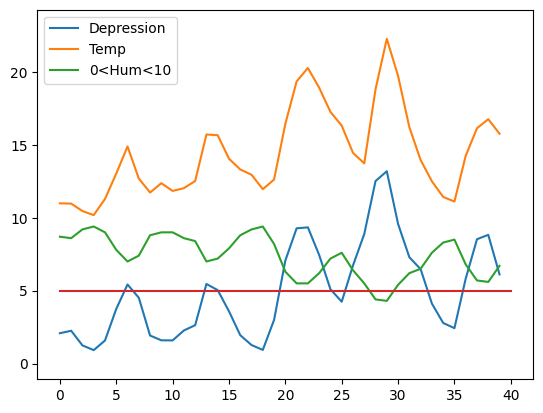

In [686]:
plt.plot(dewpt[2],label='Depression')
plt.plot(current.temp,label='Temp')
plt.plot(current.humidity/10,label='0<Hum<10')
plt.plot((0,40),(5,5))
plt.ylim(min(dewpt[2])-2,max(current.temp)+2)
plt.legend()
plt.show()


In [687]:
current.temp.head(),current.h_time.head()

(0    10.99
 1    10.97
 2    10.46
 3    10.18
 4    11.29
 Name: temp, dtype: float64,
 0    23
 1    02
 2    05
 3    08
 4    11
 Name: h_time, dtype: object)

In [688]:
current['dew_point'] = dewpt[1]
current[['h_time','temp','dew_point']]

,h_time,temp,dew_point
0,23,10.99,8.909444
1,02,10.97,8.718652
2,05,10.46,9.215403
3,08,10.18,9.257301
4,11,11.29,9.708921
...,...,...,...
35,08,11.11,8.683049
36,11,14.25,8.424213
37,14,16.14,7.613170
38,17,16.76,7.931751


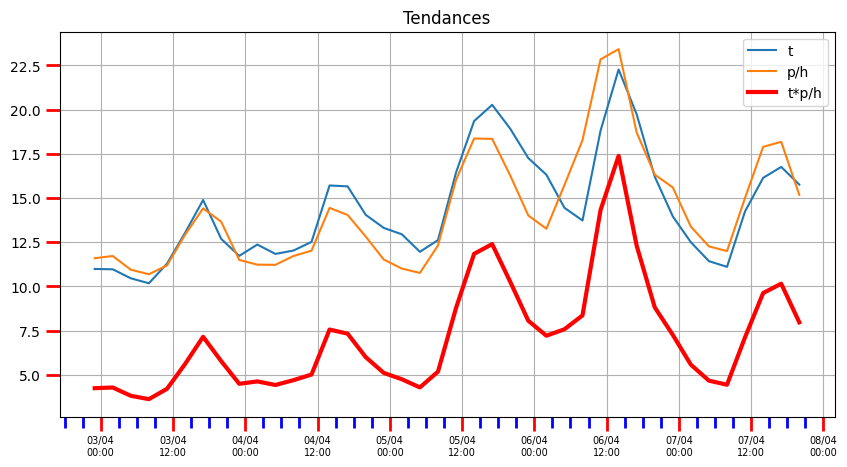

In [689]:
result1=current.temp  #*current.humidity*current.pressure
result2=(current.pressure)/(current.humidity*10)  #p/h est normalisé, on ramène le rapport autour de 1
result3=(current.temp)*result2

fig, ax = plt.subplots()

# nombre de ticks sur axe des x
major_ticks = 1/2                   # toutes les 6 heures pour 1/4, 12h pour 1/2, 3 heures pour 1/8
minor_ticks = major_ticks/4          # denominateur n = n minor ticks 


# format grid
fig.set_size_inches(10, 5)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
ax.tick_params('x', labelsize=7)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10, color='r')
ax.tick_params(which='minor', length=8, color='b')

# plot
plt.plot(current.dates, result1,label='t')
plt.plot(current.dates, result2*10,label='p/h')
plt.plot(current.dates, result3/3,label='t*p/h',lw=3,c='red')
plt.legend()
plt.title('Tendances')
plt.grid()

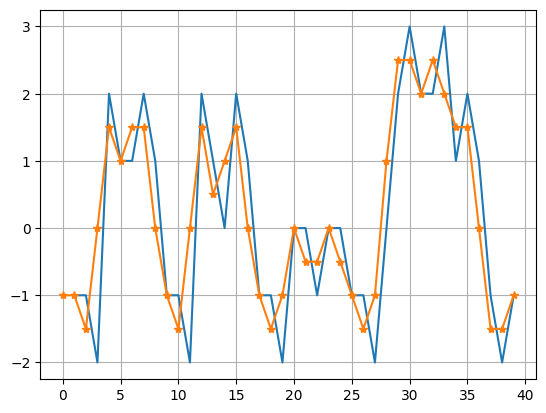

In [690]:
dy.diff().plot()
plt.plot(x,np.gradient(dy, dx), '-*', label='approx')
plt.grid()

In [691]:
len(dy)

40

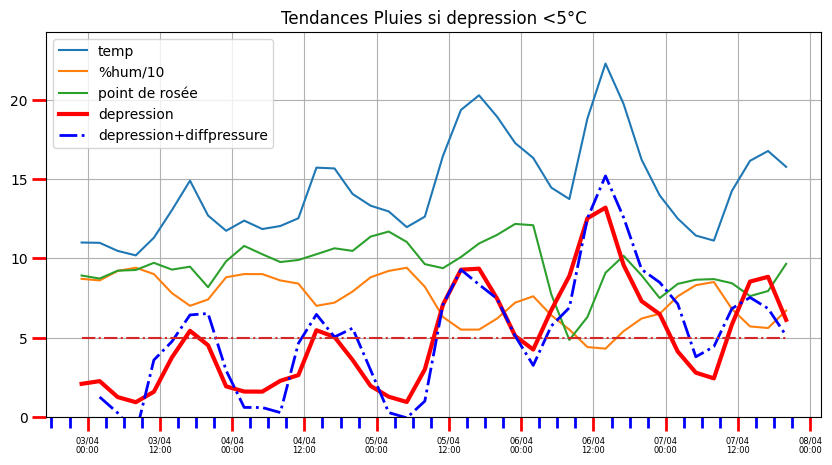

In [692]:
temp = current.temp  
# point de rosée
current['dewpoint']=dewpt[1]
point_rosee = dewpt[1]
# calcul de la dépression
depression = current.temp-point_rosee
current['depression']=depression
fig, ax = plt.subplots()

# format grid
fig.set_size_inches(10, 5)
# graduations axeX
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
ax.tick_params('x', labelsize=6)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10, color='r')
ax.tick_params(which='minor', length=8, color='b')

# plot
plt.plot(current.dates, temp,label='temp')
plt.plot(current.dates, current.humidity/10,label='%hum/10')
plt.plot(current.dates, point_rosee,label='point de rosée')#,lw=3,c='red')
# tendances pluie
#lbl = 'depr<5+ "pluie" if depression[0]<5 else ""
plt.plot(current.dates, depression,label="depression",lw=3,c='red')
plt.plot(current.dates, depression+dy.diff(),'-.',label="depression+diffpressure",lw=2,c='blue')
plt.plot((current.dates[0],current.dates[39]),(5,5),'-.')

plt.ylim(0,max(current.temp)+2)
plt.legend()
plt.title('Tendances Pluies si depression <5°C')
plt.grid()


In [693]:
datetime.now().strftime('%d/%m/%Y %H:%M:%S')

'03/04/2024 09:57:58'

In [694]:
current['tendances']=current['depression'].apply(lambda x: 'pluie' if x<5 else 'beau temps')
# 24 h
current[:20][['h_date','temp','depression','tendances']]

,h_date,temp,depression,tendances
0,02/04/2024 23:00:00,10.99,2.080556,pluie
1,03/04/2024 02:00:00,10.97,2.251348,pluie
2,03/04/2024 05:00:00,10.46,1.244597,pluie
3,03/04/2024 08:00:00,10.18,0.922699,pluie
4,03/04/2024 11:00:00,11.29,1.581079,pluie
5,03/04/2024 14:00:00,13.03,3.748080,pluie
6,03/04/2024 17:00:00,14.89,5.424443,beau temps
7,03/04/2024 20:00:00,12.69,4.515717,pluie
8,03/04/2024 23:00:00,11.73,1.922471,pluie
9,04/04/2024 02:00:00,12.37,1.594781,pluie


In [695]:
current[20:40][['h_date','temp','depression','tendances']]

,h_date,temp,depression,tendances
20,05/04/2024 11:00:00,16.44,7.067269,beau temps
21,05/04/2024 14:00:00,19.35,9.275462,beau temps
22,05/04/2024 17:00:00,20.27,9.340770,beau temps
23,05/04/2024 20:00:00,18.92,7.446151,beau temps
24,05/04/2024 23:00:00,17.26,5.097904,beau temps
25,06/04/2024 02:00:00,16.32,4.241734,pluie
26,06/04/2024 05:00:00,14.45,6.727688,beau temps
27,06/04/2024 08:00:00,13.73,8.881315,beau temps
28,06/04/2024 11:00:00,18.81,12.516802,beau temps
29,06/04/2024 14:00:00,22.27,13.189825,beau temps


In [696]:
current.h_date

0     02/04/2024 23:00:00
1     03/04/2024 02:00:00
2     03/04/2024 05:00:00
3     03/04/2024 08:00:00
4     03/04/2024 11:00:00
             ...         
35    07/04/2024 08:00:00
36    07/04/2024 11:00:00
37    07/04/2024 14:00:00
38    07/04/2024 17:00:00
39    07/04/2024 20:00:00
Name: h_date, Length: 40, dtype: object